# Half-Earth JSON resources


#### Global old
One of the first APIs provided by MOL. It is currently used to generate the **Chart 1**

https://storage.googleapis.com/cdn.mol.org/half-earth/data/reserve-coverage/all-taxa-old.json


```json
   {"taxa": ['all',
        'amphibians',
        'birds',
        'cacti',
        'conifers',
        'mammals',
        'turtles'],
    'scenario': Scenarios of protected area coverage, value represents the % of terrestrial coverage [0:50],
    "averagePercentProtectedStrict"
    "averagePercentProtectedAny"
    "speciesMeetingTargetProtectedAreaViaStrict"
    "speciesMeetingTargetProtectedAreaViaAny"
    "totalSpecies"
    "percentSpeciesMeetingTargetProtectedAreaViaStrict"
    "percentSpeciesMeetingTargetProtectedAreaViaAny"
  }
```



#### Global protection scenarios

Used to generate **Charts 2 and 3**

https://storage.googleapis.com/cdn.mol.org/half-earth/data/reserve-coverage/all-taxa.json


```json
{'taxa':['all',
        'amphibians',
        'birds',
        'cacti',
        'conifers',
        'mammals',
        'turtles']
  'scenario': Scenarios of protected area coverage, value represents the % of terrestrial coverage [0:50],
  'percentProtectedCurrently':% of species meeting adequae protection under present reserve coverage [0.0 :100.0],
  'percentSpeciesMeetingTargetProtectedAreaViaAny':% of species adequately protected under each scenario [0.0 :100.0],
  'percentProtectedAdditional': % of additional species adequately protected under a given scenario (percentSpeciesMeetingTargetProtectedAreaViaAny - percentProtectedAdditional)[0.0 :100.0]
  }
   
```



#### Regional (Cape region) protection stats

Not used in this version of the app

https://storage.googleapis.com/cdn.mol.org/half-earth/data/reserve-coverage/cape-region/all-taxa.json

```json

{'taxa':['all-taxa',
         'amphibians',
         'birds',
         'cacti',
         'conifers',
         'mammals',
       'turtles'],
  'scenario': Scenarios of protected area coverage, value represents the % of terrestrial coverage [0:50],
  'speciesMeetingTargetProtectedAreaAny':Number of species adequately protected [0:916],
  'totalSpecies':Number of species in the region [0:916]
  }
```

In [1]:
# %matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Chart 1 - Global-scale biodiversity


In [2]:
global_OLD = pd.read_json("https://storage.googleapis.com/cdn.mol.org/half-earth/data/reserve-coverage/all-taxa-old.json")

# filter by scenario 0
chart1 = global_OLD[global_OLD.scenario==0][['totalSpecies','taxa']]
chart1

,totalSpecies,taxa
0,35022,all
51,6417,amphibians
102,9987,birds
153,1413,cacti
204,606,conifers
255,4420,mammals
306,289,turtles


Remove the "All taxa" entry from the chart

In [3]:
# remove all taxa entry
chart1 = chart1[chart1.taxa!='all']
chart1

# sort by value
chart1 =  chart1.sort_values(['totalSpecies'])

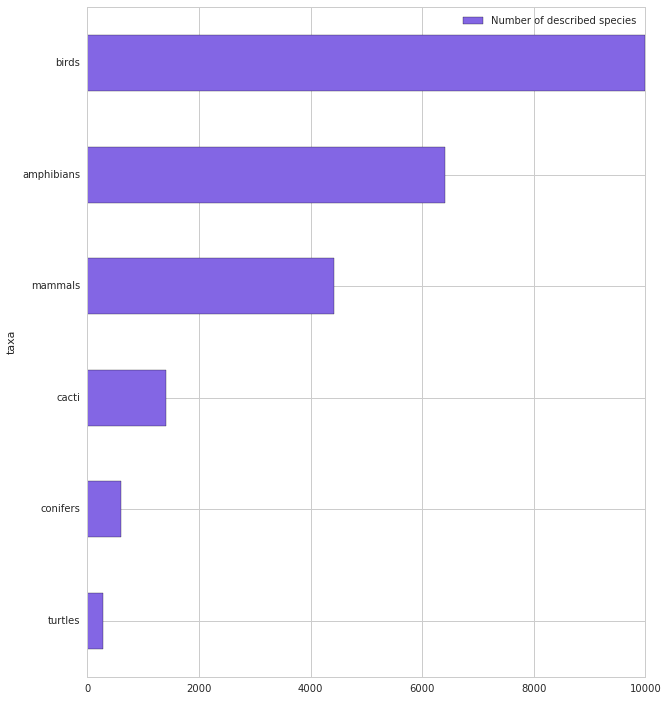

In [4]:
# plot
sns.set_style("whitegrid")
data=chart1.plot.barh('taxa','totalSpecies',
                      color="#8366e4",
                      figsize=(10,12),
                      label='Number of described species')

 
plt.show()
plt.clf()

## Chart 2 -  Global-scale protected areas

In [5]:
global_ = pd.read_json("https://storage.googleapis.com/cdn.mol.org/half-earth/data/reserve-coverage/all-taxa.json")
chart2 = global_[global_.scenario==0][['percentProtectedCurrently','taxa']]
chart2

,percentProtectedCurrently,taxa
0,54.5,all
51,30.6,amphibians
102,72.3,birds
153,20.9,cacti
204,64.5,conifers
255,57.3,mammals
306,51.2,turtles


In [6]:
# remove all taxa entry
chart2 = chart2[chart2.taxa!='all']

# sort by value
chart2 =  chart2.sort_values(['percentProtectedCurrently'])
chart2

,percentProtectedCurrently,taxa
153,20.9,cacti
51,30.6,amphibians
306,51.2,turtles
255,57.3,mammals
204,64.5,conifers
102,72.3,birds


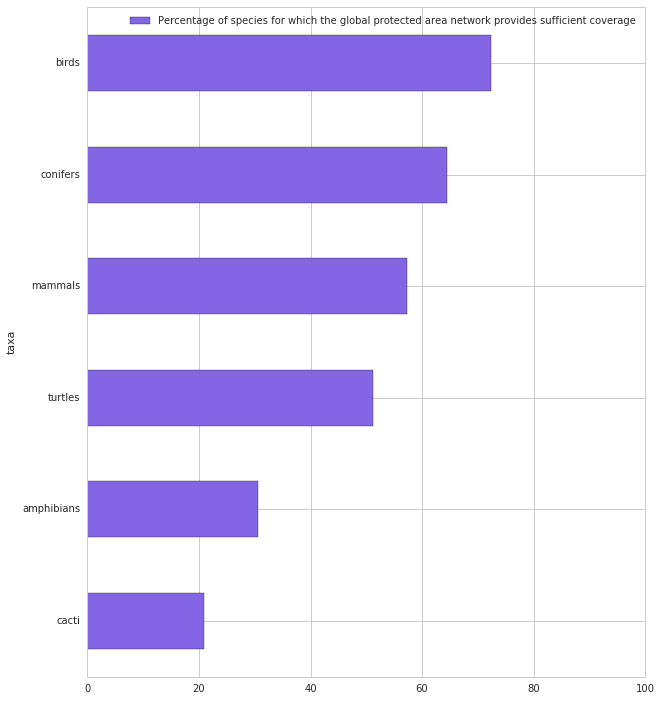

In [7]:
# plot
sns.set_style("whitegrid")
data=chart2.plot.barh('taxa','percentProtectedCurrently',
                                              color="#8366e4",
                                              figsize=(10,12),
                                             label='Percentage of species for which the global protected area network provides sufficient coverage').set_xlim(0, 100)

 
plt.show()
plt.clf()

## Chart 3 - Global conservation prioritization

In [8]:
global_ = pd.read_json("https://storage.googleapis.com/cdn.mol.org/half-earth/data/reserve-coverage/all-taxa.json")
chart3 = global_[['percentSpeciesMeetingTargetProtectedAreaViaAny','taxa','scenario']]
chart3.head()

,percentSpeciesMeetingTargetProtectedAreaViaAny,taxa,scenario
0,54.5,all,0
1,54.5,all,1
2,54.5,all,2
3,54.5,all,3
4,54.5,all,4


In [9]:
# remove all taxa entry
chart3 = chart3[chart3.taxa!='all']

# sort by value
chart3 =  chart3.sort_values(['percentSpeciesMeetingTargetProtectedAreaViaAny'])
chart3

,percentSpeciesMeetingTargetProtectedAreaViaAny,taxa,scenario
165,20.9,cacti,12
153,20.9,cacti,0
154,20.9,cacti,1
155,20.9,cacti,2
156,20.9,cacti,3
157,20.9,cacti,4
158,20.9,cacti,5
159,20.9,cacti,6
160,20.9,cacti,7
161,20.9,cacti,8


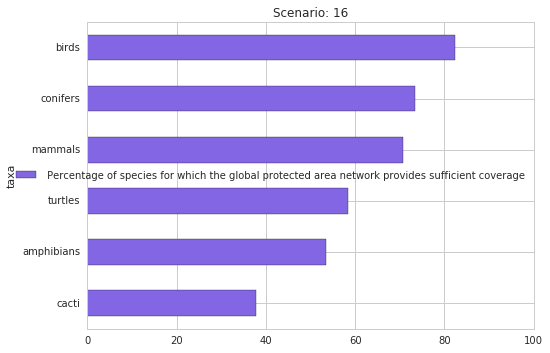

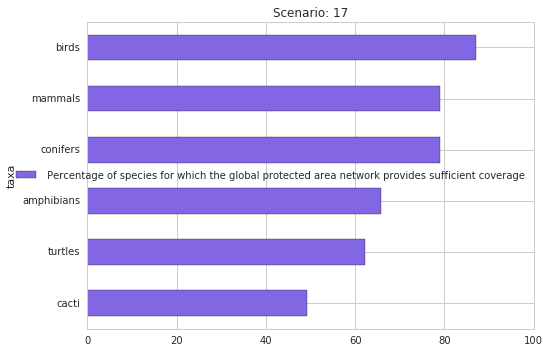

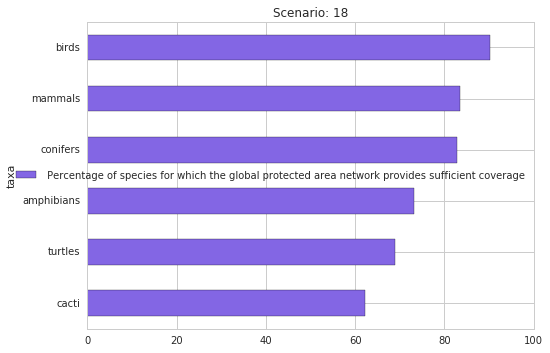

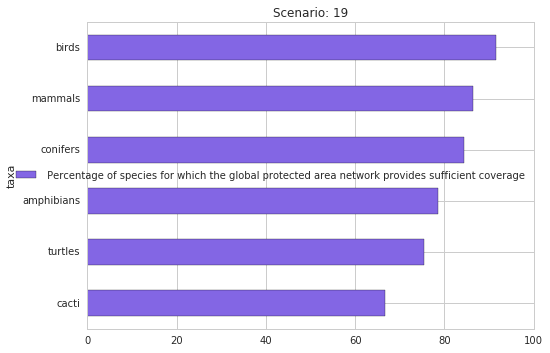

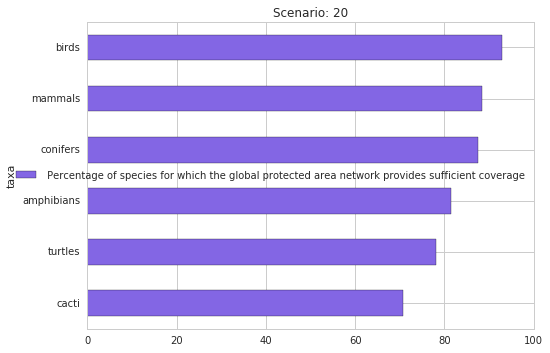

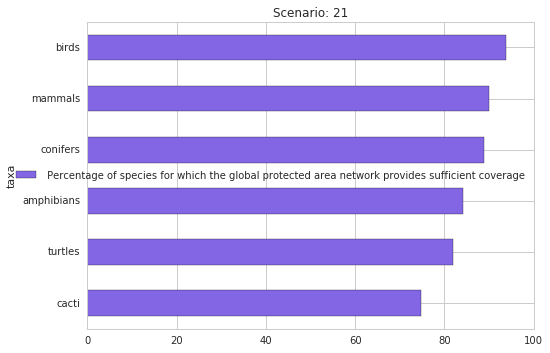

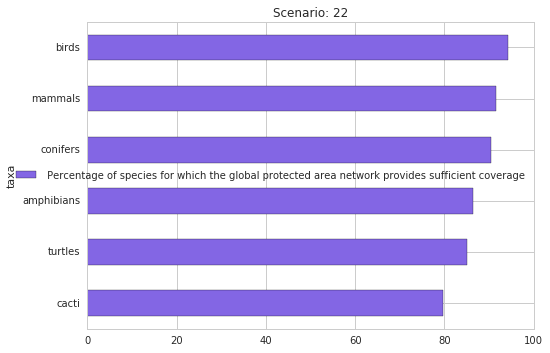

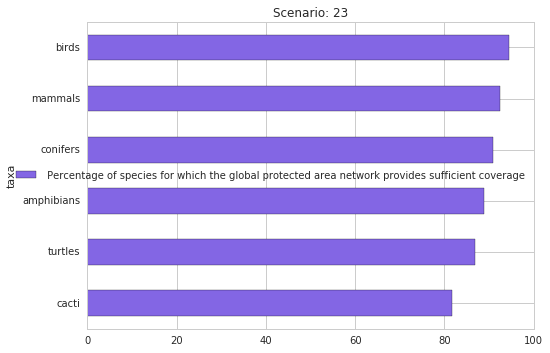

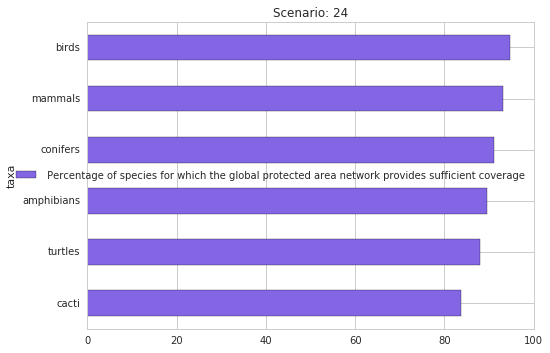

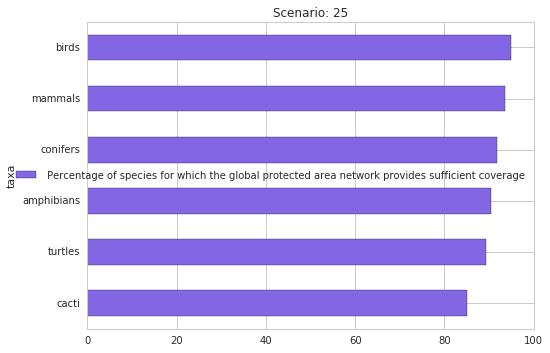

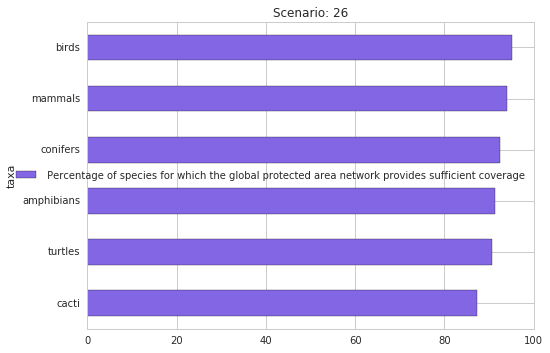

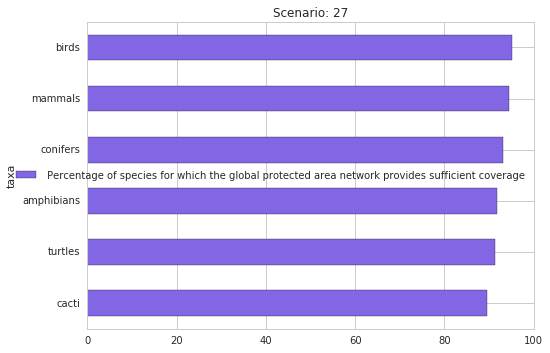

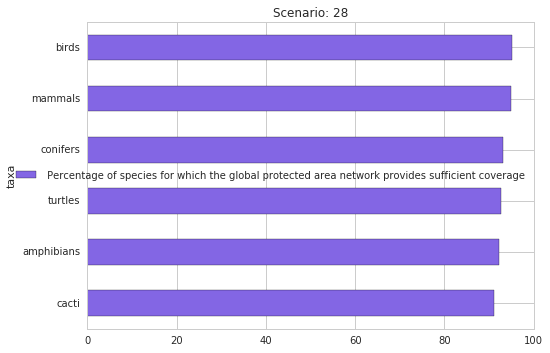

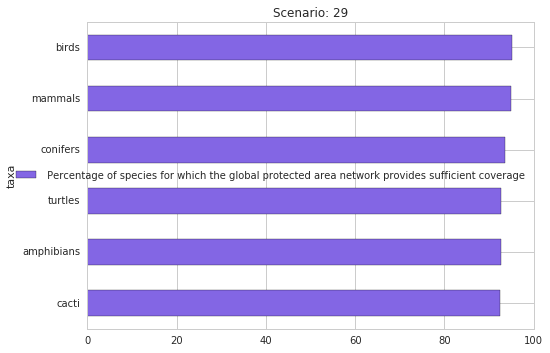

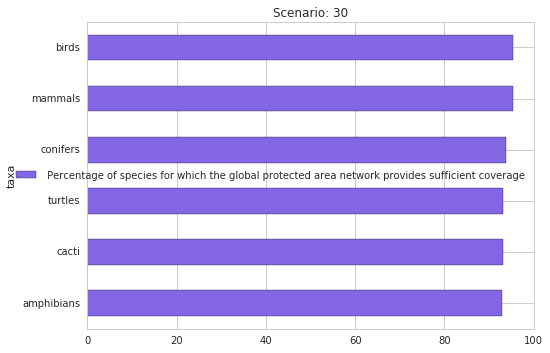

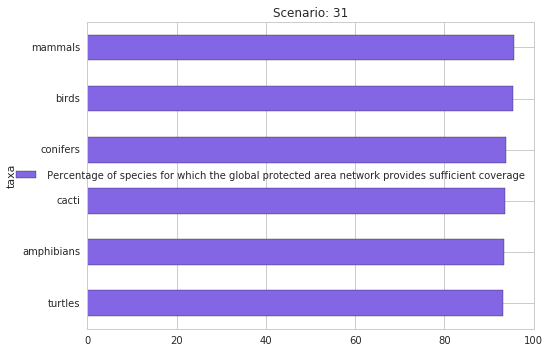

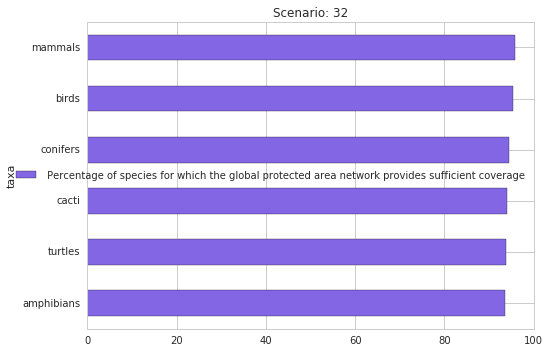

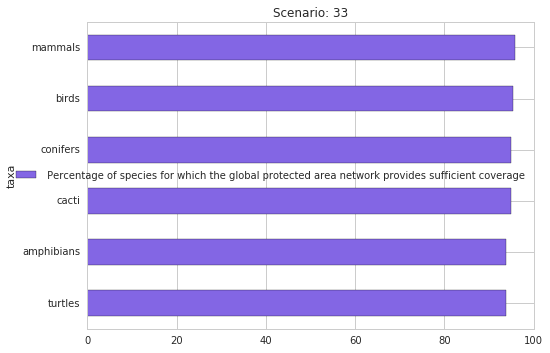

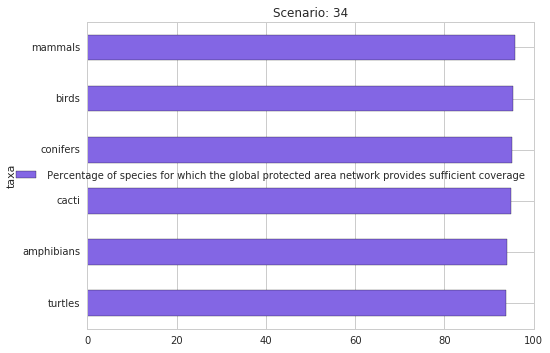

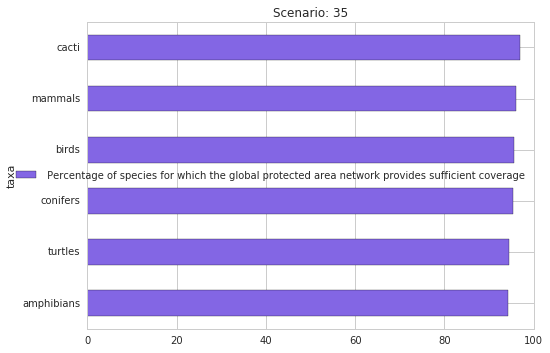

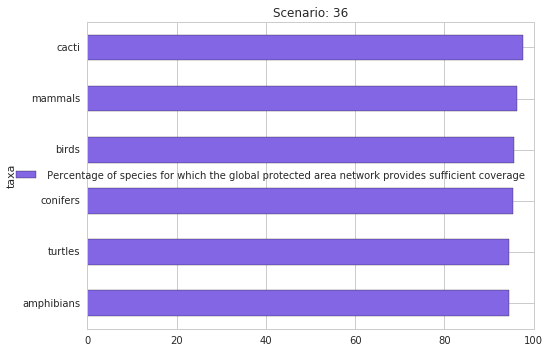

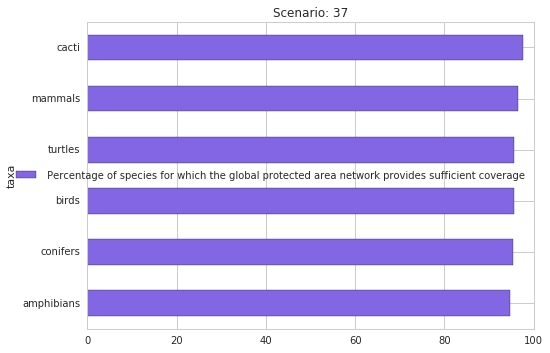

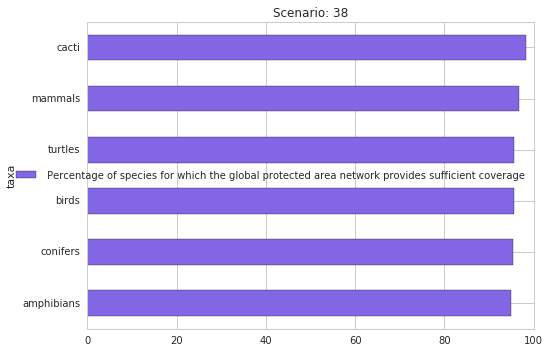

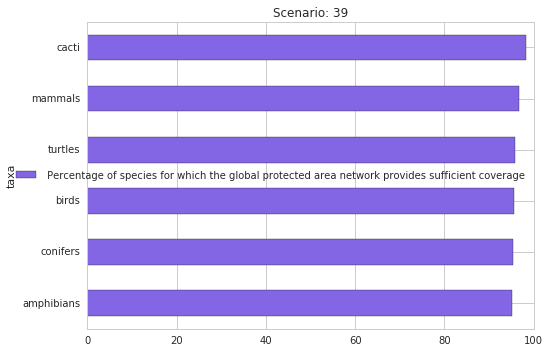

In [13]:
scenarios = global_.scenario.unique()
scenarios = scenarios[scenarios > 15]
scenarios = scenarios[scenarios < 40]

for s in scenarios:
    dat = chart3[chart3.scenario==s][['percentSpeciesMeetingTargetProtectedAreaViaAny','taxa']]
    sns.set_style("whitegrid")
    data=dat.plot.barh('taxa','percentSpeciesMeetingTargetProtectedAreaViaAny',
                                                  color="#8366e4",
                                                 label=' Percentage of species for which the global protected area network provides sufficient coverage').set_xlim(0, 100)
    plt.title('Scenario: ' + str(s))
    plt.show()
    plt.clf()
    